In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score

In [2]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

In [3]:
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima_df[~pima_df.applymap(np.isreal).all(axis=1)]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [5]:
pima_df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
pima_df.groupby(["class"]).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


C:\Users\biswa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\biswa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\biswa\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\biswa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


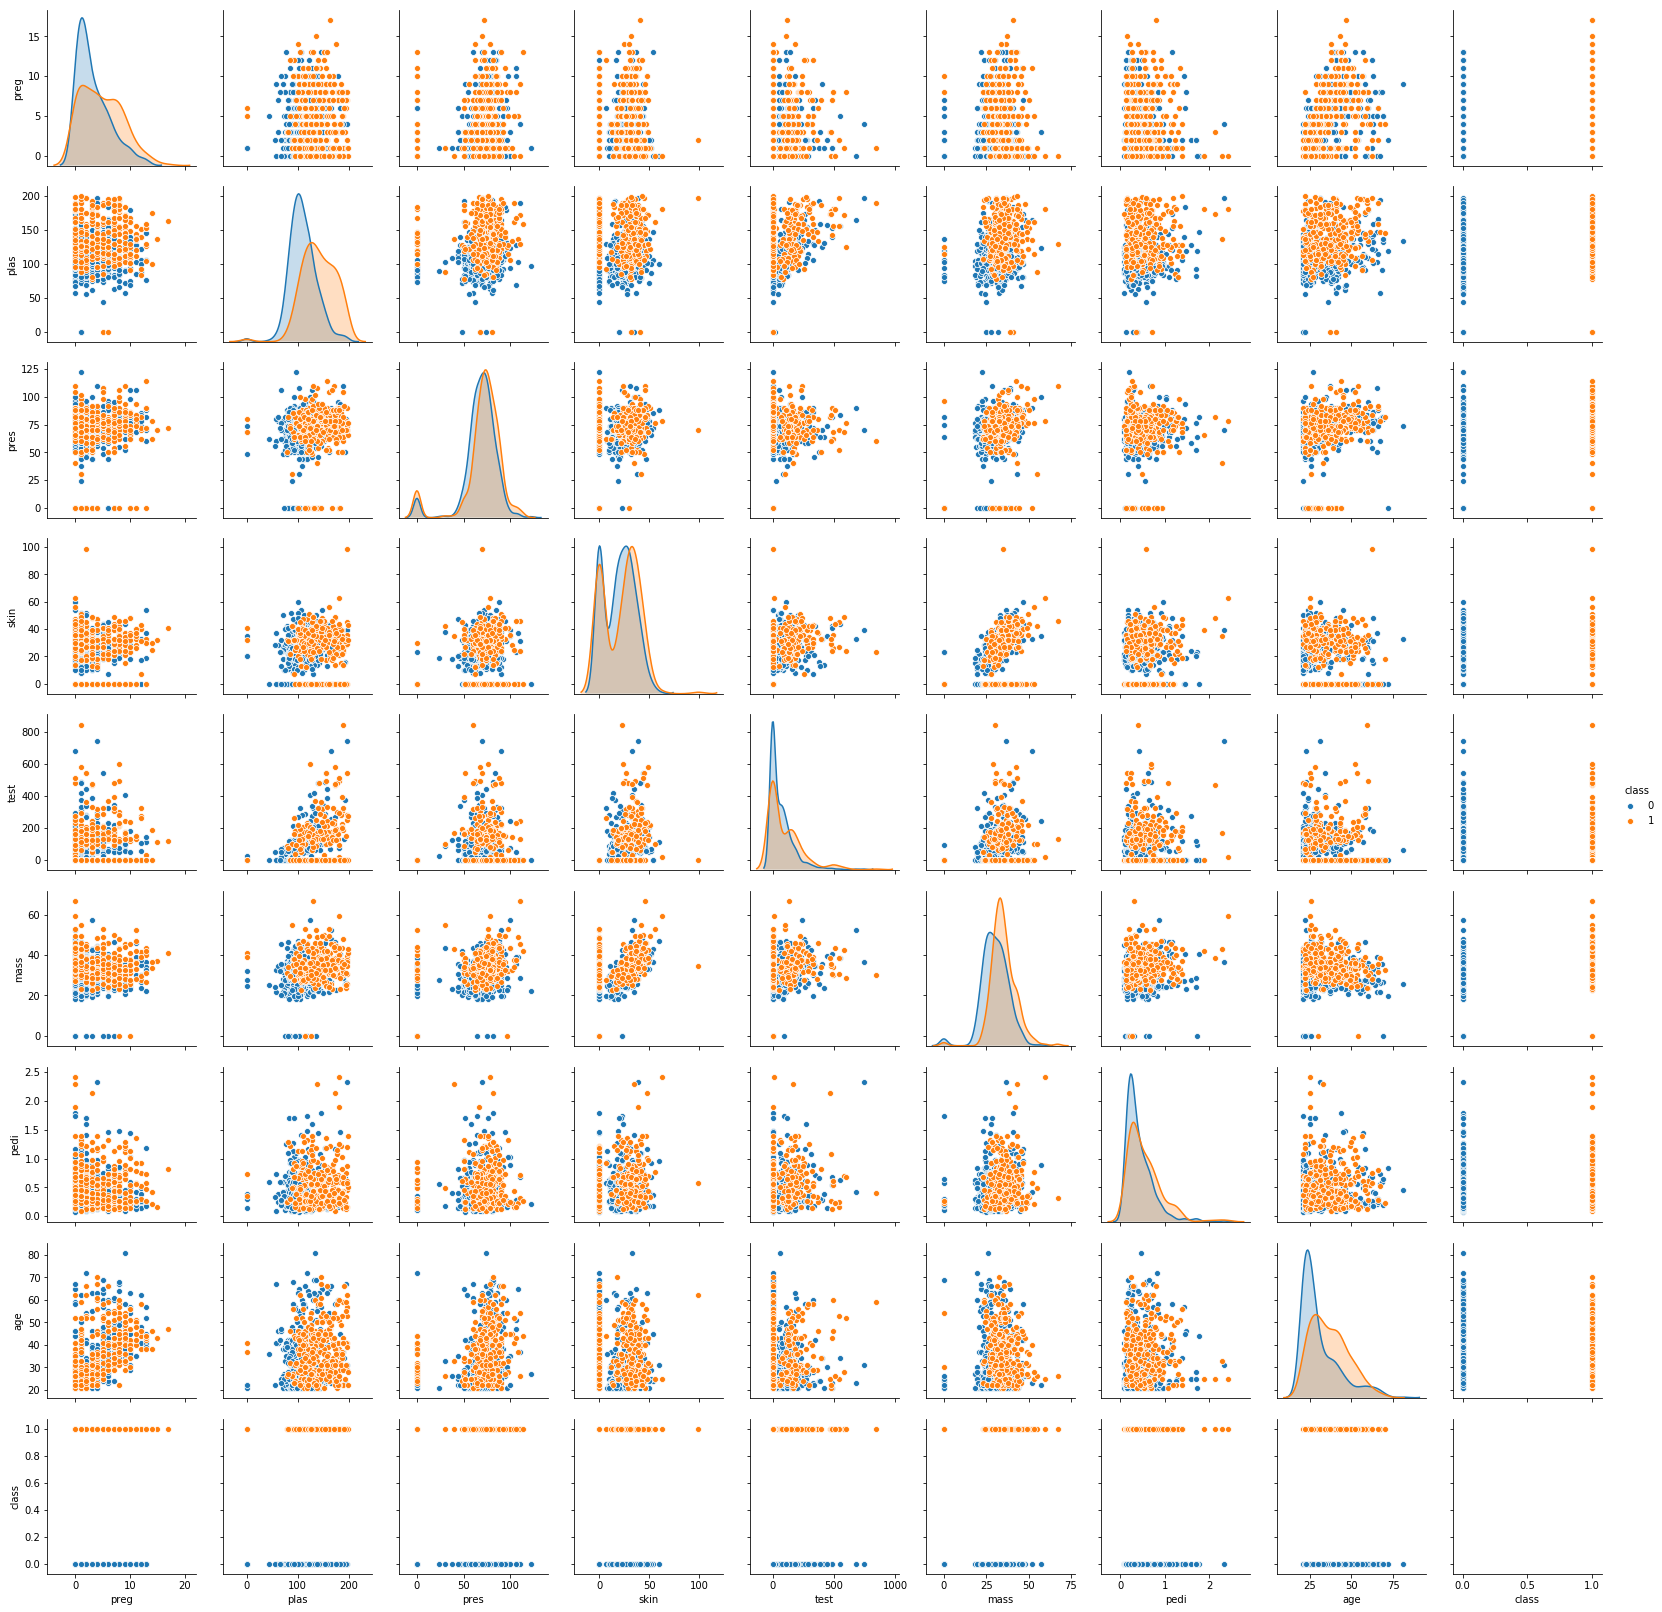

In [26]:
sns.pairplot(pima_df , hue='class' , diag_kind = 'kde')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
array = pima_df.values
X = array[:,0:7]
Y = array[:,8]
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=7)

# Logistic Regression

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.7705627705627706
[[132  15]
 [ 38  46]]
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.83       147
         1.0       0.75      0.55      0.63        84

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



C:\Users\biswa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We can judge the model through the f1-score. f1-score for 1.0 is 63%. Here 1.0 is the minority class.

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=1)
knn=KNeighborsClassifier(n_neighbors=4)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
# scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print("Testing Accuracy")
print(knn.score(scaledX_test,y_test))
print("Training Accuracy")
print(knn.score(scaledX_train,y_train))
predicted = knn.predict(scaledX_test)
print("Confusion Matrix")
print(confusion_matrix(y_test,predicted))

Testing Accuracy
0.7597402597402597
Training Accuracy
0.7947882736156352
Confusion Matrix
[[91  8]
 [29 26]]


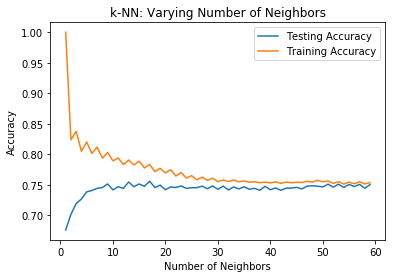

In [34]:
neighbors = np.arange(1, 60)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

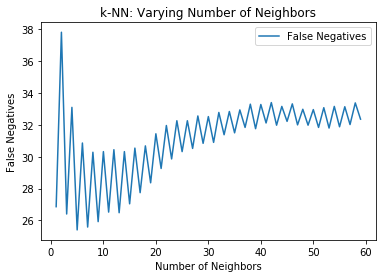

In [35]:
from matplotlib import pyplot as plt
import numpy as np
neighbors = np.arange(1, 60)
fn_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    fn=[]
    for j in range(50):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        fn.append(confusion_matrix(y_test,predicted)[1,0])
    #Compute accuracy on the training set
    fn_plot[i] = np.mean(fn)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, fn_plot, label = 'False Negatives')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('False Negatives')
plt.show()

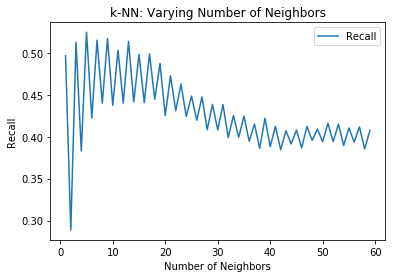

In [36]:
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score
import numpy as np
neighbors = np.arange(1, 60)
recall_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    recall=[]
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        recall.append(recall_score(y_test,predicted))
    #Compute accuracy on the training set
    recall_plot[i] = np.mean(recall)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, recall_plot, label = 'Recall')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Recall')
plt.show()

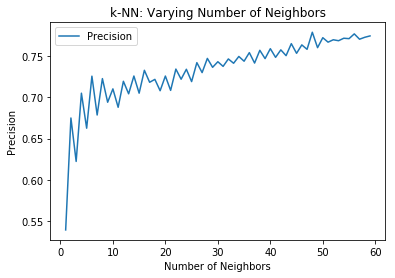

In [37]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score
import numpy as np
neighbors = np.arange(1, 60)
precision_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    precision=[]
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        precision.append(precision_score(y_test,predicted))
    #Compute accuracy on the training set
    precision_plot[i] = np.mean(precision)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, precision_plot, label = 'Precision')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Precision')
plt.show()

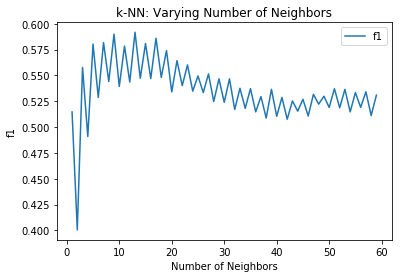

In [38]:
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
import numpy as np
neighbors = np.arange(1, 60)
f1_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    f1=[]
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        f1.append(f1_score(y_test,predicted))
    #Compute accuracy on the training set
    f1_plot[i] = np.mean(f1)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, f1_plot, label = 'f1')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('f1')
plt.show()

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
# perform 10-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors based on accuracy is %d" % best_k)

The optimal number of neighbors based on accuracy is 35


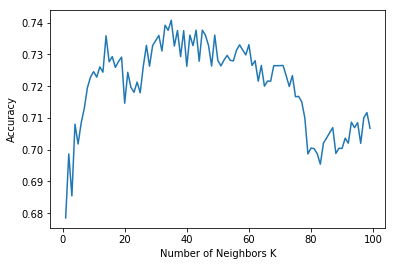

In [43]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(k_neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
# perform 10-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='recall')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors based on recall is %d" % best_k)

The optimal number of neighbors based on recall is 1


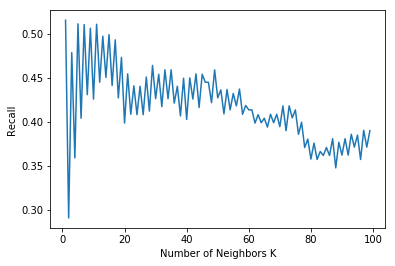

In [45]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(k_neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Recall')
plt.show()

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
# perform 10-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='roc_auc')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors based on ROC-AUC is %d" % best_k)

The optimal number of neighbors based on ROC-AUC is 46


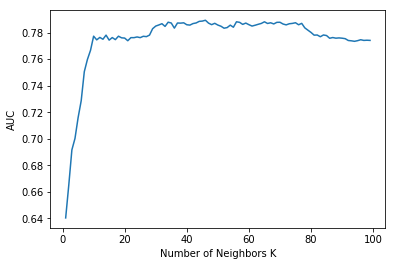

In [47]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(k_neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('AUC')
plt.show()

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,40))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
# perform 10-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='f1')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors based on F1-Score is %d" % best_k)

The optimal number of neighbors based on F1-Score is 11


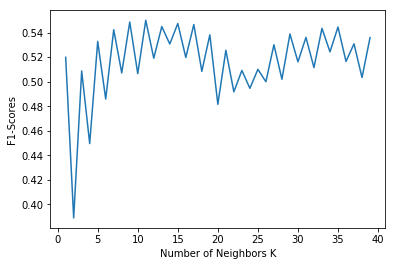

In [49]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(k_neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('F1-Scores')
plt.show()

Final Model for KNN based on f1 score:

In [51]:
from sklearn.metrics import confusion_matrix
final = KNeighborsClassifier(n_neighbors=11)
final.fit(X_train,y_train)
predicted = final.predict(X_test)

In [54]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[84 15]
 [26 29]]
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80        99
         1.0       0.66      0.53      0.59        55

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



f1-score for 1.0 is 59%

# Decision Tree

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
max_depth = []
for k in myList:
    dt = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='f1')
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of max_depth is %d" % best_k)

The optimal number of max_depth is 86


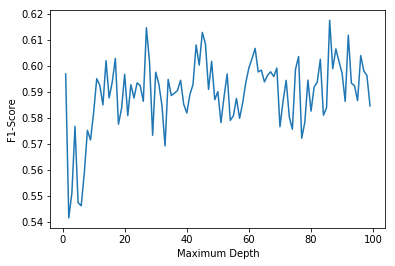

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(max_depth, cv_scores)
plt.xlabel('Maximum Depth')
plt.ylabel('F1-Score')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
final = DecisionTreeClassifier(max_depth=86)
final.fit(X_train,y_train)
predicted = final.predict(X_test)

In [15]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[76 23]
 [22 33]]
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77        99
         1.0       0.59      0.60      0.59        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



f1-score for 1.0 is 59%

# Random Forest

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
n_estimators = []
for k in myList:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')
    cv_scores.append(scores.mean())
    n_estimators.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of n_estimators is %d" % best_k)

The optimal number of n_estimators is 15


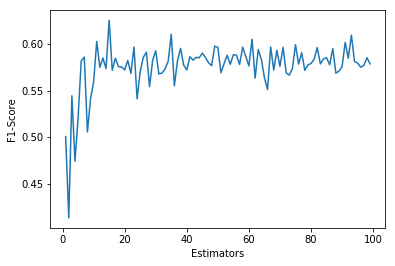

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(max_depth, cv_scores)
plt.xlabel('Estimators')
plt.ylabel('F1-Score')
plt.show()

In [18]:
final = RandomForestClassifier(n_estimators=15)
final.fit(X_train,y_train)
predicted = final.predict(X_test)

In [19]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[89 10]
 [23 32]]
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        99
         1.0       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



f1-score for 1.0 is 66%

# Bagging Classifier with Logistic Regression

In [21]:
from sklearn.ensemble import BaggingClassifier

In [22]:
lr = LogisticRegression()
bg = BaggingClassifier(base_estimator=lr)
bg.fit(X_train,y_train)
predicted = bg.predict(X_test)

C:\Users\biswa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\biswa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\biswa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\biswa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\biswa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [23]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[91  8]
 [28 27]]
              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83        99
         1.0       0.77      0.49      0.60        55

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.77      0.75       154



f1-score for 1.0 is 60%